In [93]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [94]:
#Read steam-user data into a dataframe
locationUsersFile=pathlib.Path("C:\\Users\\\z004cnpx\\Desktop\\steam-200k.csv")
df = pd.read_csv(locationUsersFile, header=None, names=['UserID', 'Game', 'Action', 'Hours', 'Other'],  encoding='utf-8')
df = df[df['Action'] == 'play']
del df['Other']

In [95]:
df.head()
n_users = len(df.UserID.unique())
n_games = len(df.Game.unique())
print('There are {0} users and {1} games in the data'.format(n_users, n_games))

There are 11350 users and 3600 games in the data


In [96]:
## Drop duplicates
clean_df=df.drop_duplicates(subset=['UserID','Game'],keep='last')

In [97]:
## Some analysis on the data
game_total_hrs = clean_df.groupby(by='Game')['Hours'].sum()
most_played_games = game_total_hrs.sort_values(ascending=False)[:20]

In [98]:
most_played_games.head()

Game
Dota 2                             981684.6
Counter-Strike Global Offensive    322771.6
Team Fortress 2                    173673.3
Counter-Strike                     134261.1
Sid Meier's Civilization V          99821.3
Name: Hours, dtype: float64

<AxesSubplot:xlabel='hours', ylabel='game'>

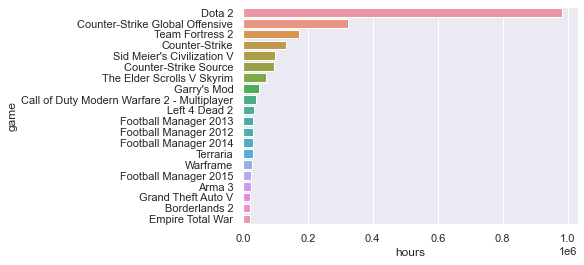

In [99]:
## 
game_counts = clean_df.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
game_counts = pd.DataFrame({'game': game_counts.index, 'hours': game_counts.values})[0:20]
sns.set()
sns.barplot(y = 'game', x = 'hours', data = game_counts)
#aggregate on the sum of hours for each game
# more same detail in Top 20 games with the most playing users plot

<AxesSubplot:xlabel='hours_played', ylabel='game'>

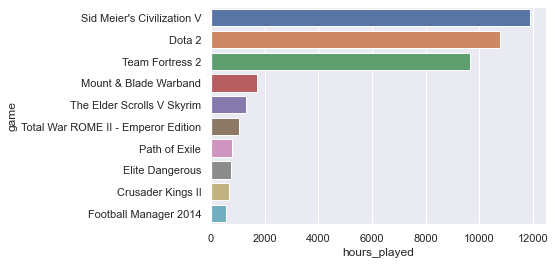

In [100]:
### most active users by hours played and have a glance at the game they play
top = 5
nb_games =10
#### top playing users
user_counts = clean_df.groupby('UserID')['Hours'].agg(np.sum).sort_values(ascending=False)[0:top]
mask = clean_df['UserID'].isin(user_counts.index)
df_infos_user = clean_df.loc[mask].loc[clean_df['Action'] == 'play']
hours_played = df_infos_user.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
hours_played = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:nb_games]
sns.set()
sns.barplot(y = 'game', x = 'hours_played', data = hours_played) 

<AxesSubplot:xlabel='Hours', ylabel='Game'>

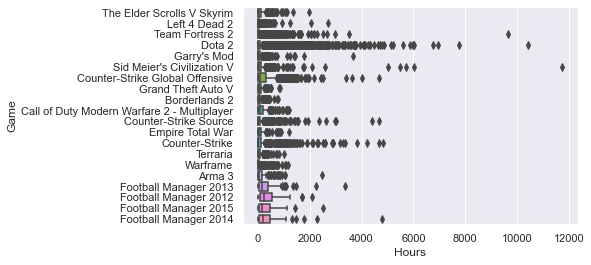

In [102]:
#user data distribution and user's playing habits, a box plot is produced for the top 20 most played game, based in the total of hours played.
nb_top_games = 20
hours_played = clean_df.groupby('Game')['Hours'].agg(np.sum).sort_values(ascending=False)
most_played_games = pd.DataFrame({'game': hours_played.index, 'hours_played': hours_played.values})[0:nb_top_games]
mask = clean_df['Game'].isin(most_played_games['game'])
df_infos_user = clean_df.loc[mask][['Hours', 'Game']]
sns.set()
sns.set_style("darkgrid")
sns.boxplot(x="Hours", y="Game", data=df_infos_user)
#Several outliers, we can see for example a user played more than 10,000 hours "Dota 2". Another interesting example, a user played almost 12,000 hours "Sid Meier's Civilization V".

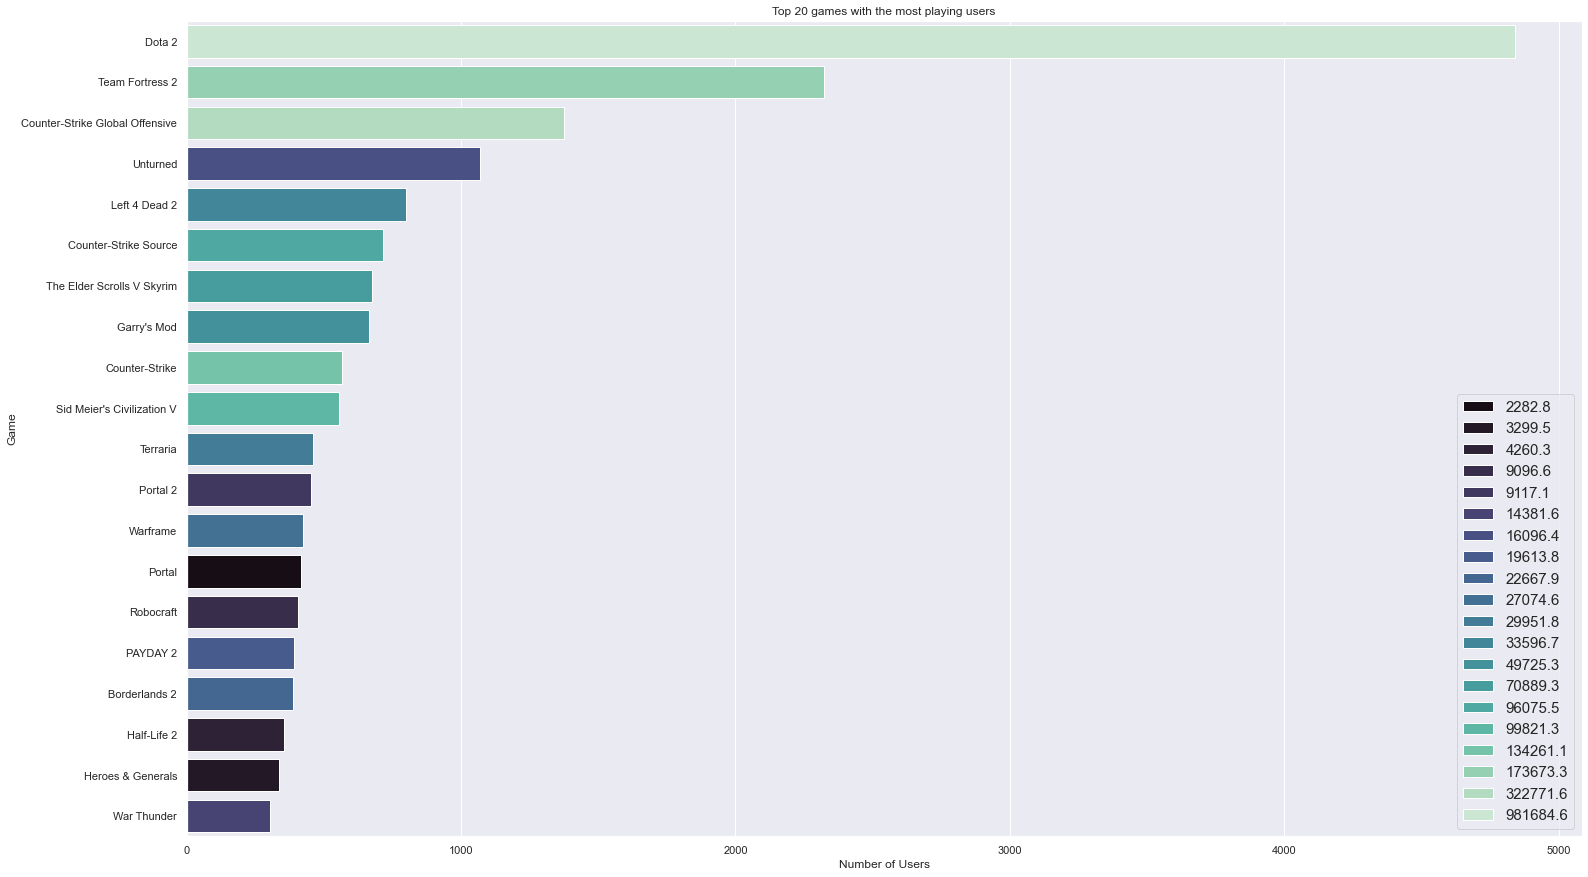

In [103]:
game_total_hrs = clean_df.groupby(by='Game')['Hours'].sum()
most_played_games = game_total_hrs.sort_values(ascending=False)[:20]
### game with the highest number of users
game_freq = clean_df.groupby(by='Game').agg({'UserID': 'count', 'Hours': 'sum'}).reset_index()
top20 = game_freq.sort_values(by='UserID',ascending=False)[:20].reset_index()
top20['Hours']=top20['Hours'].round(1)
plt.figure(figsize=(25, 15))
ax = sns.barplot(x='UserID', y='Game', hue='Hours',alpha=1,data=top20, palette='mako',dodge=False)
ax.set(xlabel='Number of Users', ylabel='Game', title='Top 20 games with the most playing users')
ax.legend(fontsize=15)
plt.show()
### We can clearly see no relation between more user and more hours. 
### Unturned is at 4th by the number of users but its sum of hours played is lower than e.g. counter-strike

In [104]:
clean_df.head(3)
### save to a new csv
clean_df.to_csv(pathlib.Path("C:\\Users\\z004cnpx\\Desktop\\steam-user-game-clean.csv"), index=False)

In [105]:
import pathlib
from pandas import read_csv

locationUsersFile=pathlib.Path("C:\\Users\\z004cnpx\\Desktop\\steam-user-game-clean.csv")
userGameSet = read_csv(locationUsersFile)
# get 20% of random elements (combination user-game) for test dataset
testUserGameSet = userGameSet.sample(frac=0.2, replace=False)

# get the remaining for training
trainUserGameSet = userGameSet[~userGameSet.isin(testUserGameSet)].dropna();

# output csvs
testUserGameSet.to_csv(pathlib.Path("C:\\Users\\z004cnpx\\Desktop\\steam-user-game-test.csv"), index=False)
trainUserGameSet.to_csv(pathlib.Path("C:\\Users\\z004cnpx\\Desktop\\steam-user-game-train.csv"), index=False)

locationUsersFile=pathlib.Path("C:\\Users\\z004cnpx\\Desktop\\steam-user-game-train.csv")
userGameSetTrainData = read_csv(locationUsersFile)
locationTestFile = pathlib.Path("C:\\Users\\z004cnpx\\Desktop\\steam-user-game-test.csv");
userGameSetTestData = read_csv(locationTestFile);


In [110]:
n_users = len(userGameSetTrainData.UserID.unique())
n_games = len(userGameSetTrainData.Game.unique())
import re
print('There are {0} users and {1} games in the train data'.format(n_users, n_games))

game_freq = userGameSetTrainData.groupby(by='Game').agg({'UserID': 'count', 'Hours': 'sum'}).reset_index()
top20 = game_freq.sort_values(by='UserID',ascending=False)[:20].reset_index()
print('Top 20 games are {0}'.format(top20))
userGameSetTrainData['UserID']=userGameSetTrainData['UserID'].astype(int)

There are 10003 users and 3359 games in the train data
Top 20 games are     index                             Game  UserID     Hours
0     840                           Dota 2    3852  764156.6
1    2788                  Team Fortress 2    1839  144321.1
2     609  Counter-Strike Global Offensive    1093  257582.2
3    3125                         Unturned     831   12363.2
4    1602                    Left 4 Dead 2     647   24711.2
5     611            Counter-Strike Source     580   79835.6
6    2855       The Elder Scrolls V Skyrim     554   57611.0
7    1207                      Garry's Mod     520   38076.1
8     606                   Counter-Strike     478  106157.8
9    2502       Sid Meier's Civilization V     423   86049.3
10   2098                         Portal 2     373    8001.0
11   2800                         Terraria     349   23650.7
12   3193                         Warframe     344   21558.8
13   2308                        Robocraft     337    7184.2
14   2097    

In [111]:
userGameSetTrainData.head(3)

,UserID,Game,Action,Hours
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,play,87.0
2,151603712,Spore,play,14.9


In [112]:
## sparsity of train and test datasets

sparsity = userGameSetTrainData.shape[0] / float(n_users * n_games)
print('{:.2%} of the user-item matrix is filled'.format(sparsity))

n_users_test = len(userGameSetTestData.UserID.unique())
n_games_test = len(userGameSetTestData.Game.unique())
sparsityTest = userGameSetTestData.shape[0] / float(n_users_test * n_games_test)
print('{:.2%} of the user-item matrix is filled TEST'.format(sparsity))

print('Shape of the training', userGameSetTrainData.shape)

print('Shape of the testing', userGameSetTestData.shape)

userGameSetTrainData
# we need to have same column dimensions to match rate etween test and train data further for recommedation.

0.17% of the user-item matrix is filled
0.17% of the user-item matrix is filled TEST
Shape of the training (56382, 4)
Shape of the testing (14095, 4)


,UserID,Game,Action,Hours
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,play,87.0
2,151603712,Spore,play,14.9
3,151603712,Fallout New Vegas,play,12.1
4,151603712,HuniePop,play,8.5
...,...,...,...,...
56377,128470551,Fallen Earth,play,2.4
56378,128470551,Magic Duels,play,2.2
56379,128470551,Titan Souls,play,1.5
56380,128470551,Grand Theft Auto Vice City,play,1.5


In [113]:
##For evaluation purpose keeping only users who are both in training and testing
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 
final_users = intersection(list(userGameSetTrainData['UserID'].unique()),list(userGameSetTestData['UserID'].unique()))
userGameSetTestData = userGameSetTestData[userGameSetTestData['UserID'].isin(list(final_users))]
userGameSetTrainData = userGameSetTrainData[userGameSetTrainData['UserID'].isin(list(final_users))]
### Here we need same number of distinct users to avoid recommendation errors.
print('unique_user in training:',len(list(userGameSetTrainData['UserID'].unique())),'and unique_user in testing:',len(list(userGameSetTestData['UserID'].unique())))

unique_user in training: 3165 and unique_user in testing: 3165


In [114]:
userGameSetTestData.sort_values(['UserID','Game'],axis=0,inplace=True)
userGameSetTrainData.sort_values(['UserID','Game'],axis=0,inplace=True)

C:\Users\z004cnpx\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [115]:
## Mapping UserID, Game to user_dict, game_dict
user_dict = {}
for i,user in enumerate(sorted(userGameSetTrainData.UserID.unique())):
    user_dict[user] = i 
    
game_dict = {}
for i,game in enumerate(userGameSetTrainData.Game.unique()):
    game_dict[game] = i 

In [116]:
userGameSetTrainData['UserID'] = [user_dict[i] for i in userGameSetTrainData.UserID]
userGameSetTestData['UserID'] = [user_dict[i] for i in userGameSetTestData.UserID]
userGameSetTrainData['score'] = userGameSetTrainData.Hours.values  

C:\Users\z004cnpx\AppData\Local\Temp/ipykernel_3960/1906743547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userGameSetTrainData['UserID'] = [user_dict[i] for i in userGameSetTrainData.UserID]
C:\Users\z004cnpx\AppData\Local\Temp/ipykernel_3960/1906743547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  userGameSetTrainData['score'] = userGameSetTrainData.Hours.values


In [117]:
#Prepare user-game-train sparse matrix for MF
game_user_matrix = pd.DataFrame(userGameSetTrainData.pivot(index='UserID', columns='Game', values='score'))
game_user_matrix.fillna(0,inplace=True)
print('sparsity in data:',(1.0 - (np.count_nonzero(game_user_matrix) / float(game_user_matrix.size))))

sparsity in data: 0.9955956723634449


In [118]:
##huge sparsity shown in the train dataset. Not every user played every games, hence it is normal
### check match rate as screening
import scipy.sparse as sparse
game_dict = {}
for i,game in enumerate(game_user_matrix.columns):
    game_dict[game] = i
game_user_matrix_sparse = sparse.csr_matrix(np.array(game_user_matrix))
game_user_matrix_sparse.shape 

(3165, 3300)

In [119]:
#Reversing user-dict to get the userIds back
user_rev_dict = {v: k for k, v in user_dict.items()}
user_id = pd.Series(list(user_rev_dict.values())).values
user_id = user_id[:,np.newaxis]
user_id = user_id.reshape((len(user_id)))
print(user_id)

[     5250     76767     86540 ... 308468736 308695132 308760273]


In [120]:
# prepare test data for matching with recommended 
# get userIds as numeric, if parsing fails then NaN
userGameSetTestData[['UserID']] = userGameSetTestData[['UserID']].apply(pd.to_numeric, errors='coerce')
users = []
games = []
for u,i in enumerate(np.unique(userGameSetTestData['UserID'])):
    user = user_rev_dict[u]
    users.append(user)
    l = list(userGameSetTestData[userGameSetTestData['UserID'] == i]['Game'])
    game = [game_dict[x] if x in game_dict.keys() else 9999 for x in l]
    games.append(game)
test_actual_user_games = pd.DataFrame({'user_id':user_id,'game':games})
print('users list length:',len(users)) 
print('user_id list length:',len(user_id)) 
print('game_dict list length:',len(game_dict)) 
print('games list length:',len(games)) 
test_actual_user_games

users list length: 3165
user_id list length: 3165
game_dict list length: 3300
games list length: 3165


,user_id,game
0,5250,"[510, 762, 827]"
1,76767,"[79, 429, 441, 601, 2256, 2890, 2925]"
2,86540,"[102, 1061, 2989]"
3,229911,"[2064, 2744]"
4,298950,"[80, 281, 370, 484, 510, 601, 701, 858, 891, 1..."
...,...,...
3160,307674833,[3138]
3161,307688442,[1403]
3162,308468736,[1674]
3163,308695132,"[380, 600]"


In [121]:
## now it is time using ALS MF
import implicit
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=100)
alpha = 15
model.fit((game_user_matrix_sparse * alpha).astype('double'))

  0%|          | 0/100 [00:00<?, ?it/s]

In [122]:
# get similarity score
def recommend_items_to_users_MF(model,top_items=20):
    score = np.dot(model.item_factors,model.user_factors.T) 
    nn = np.argsort(-score)[:, :top_items]
    return nn

In [123]:
nn_mf = recommend_items_to_users_MF(model,top_items=20)
print(nn_mf.shape)

(3165, 20)


In [124]:
#Dataframe to display recommended items for every userID
NN_MF = [nn_mf[i] for i in range(len(nn_mf))]
recommended_MF = pd.DataFrame({'UserID':user_id,'Game':NN_MF})
recommended_MF.head(3)

,UserID,Game
0,5250,"[2744, 599, 1579, 1190, 827, 2807, 601, 2755, ..."
1,76767,"[2744, 599, 2807, 1190, 2755, 1579, 2461, 827,..."
2,86540,"[2064, 2461, 1314, 2065, 599, 601, 2744, 1579,..."


In [125]:
# Calculating match rate(at least one game)
cnt = 0
match = []
for i in range(recommended_MF.shape[0]):
    l1=recommended_MF['Game'][i]
    l2=test_actual_user_games['game'][i]
    if len(intersection(l1,l2)) > 0:
        cnt+=1
        match.append(1)
    else:
        match.append(0)
print('match rate accuracy:', cnt/recommended_MF.shape[0]) 

match rate accuracy: 0.5570300157977883


In [126]:
## list out keys and values separately
key_list = list(game_dict.keys())
val_list = list(game_dict.values())
 
#### discover dictionary - print key with val 100  (TEST check method* output user games )
position = val_list.index(2764)
print(key_list[position])

The Adventures of Tree


In [127]:
## Number of recommendation
n_recommendation = 10
### create dataframe for recommendations
col_names = list(map(str, range(1, n_recommendation + 1)))
col_names = ["UserID"] + col_names

In [128]:
def make_recommendation_for_user(user_id, suggestion_list):
    if type(suggestion_list) is not list or len(suggestion_list) == 0:
        # if there is no suggestion, return empty
        return pd.DataFrame(data=[[user_id] + [""] * n_recommendation], columns=col_names)
    #if recommendation count is lower than 10, recommend only available

    if len(recommended_MF.index) < n_recommendation:
        return pd.DataFrame(data=[[user_id] + suggestion_list +
                               [""] * (n_recommendation - len(recommendation.index))],
                         columns=col_names)
    else:
        return pd.DataFrame(data=[[user_id] + suggestion_list[0:n_recommendation]],
                         columns=col_names)

In [129]:
output_file= pathlib.Path("C:\\Users\\z004cnpx\\Desktop\\collaborative_recommender_output_ALS.csv")
recommendationByUserData = pd.DataFrame(columns=col_names)
previousId = ""
listSuggestion = list()

# loop on all row and get recommendations for user
for index, row in recommended_MF.iterrows():
    if previousId != row.UserID:
        recommendationByUserData = pd.concat([recommendationByUserData,
                                           make_recommendation_for_user(previousId, listSuggestion)],
                                          ignore_index=True)
        previousId = row.UserID
        listSuggestion = list()
    for j in row.Game:
        listSuggestion.append(key_list[val_list.index(j)])

# add the last element for the last user
recommendationByUserData = pd.concat([recommendationByUserData,
                                   make_recommendation_for_user(previousId, listSuggestion)],
                                  ignore_index=True)
recommendationByUserData.to_csv(output_file, index=False)